In [19]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv("../bike-sharing-demand/train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
print("count samples & features: ", df.shape)
print("Are there missing values: ", df.isnull().any().any())

count samples & features:  (10886, 12)
Are there missing values:  False


In [6]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [7]:
df.season.unique()

array([1, 2, 3, 4])

In [8]:
df.season.nunique()

4

In [10]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
for column in df.columns:
    print(column, df[column].nunique())

datetime 10886
season 4
holiday 2
workingday 2
weather 4
temp 49
atemp 60
humidity 89
windspeed 28
casual 309
registered 731
count 822


In [13]:
df.holiday.unique()

array([0, 1])

In [16]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [17]:
df.datetime.dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int64

In [18]:
df.datetime.dt.hour

0         0
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10
11       11
12       12
13       13
14       14
15       15
16       16
17       17
18       18
19       19
20       20
21       21
22       22
23       23
24        0
25        1
26        2
27        3
28        4
29        6
         ..
10856    18
10857    19
10858    20
10859    21
10860    22
10861    23
10862     0
10863     1
10864     2
10865     3
10866     4
10867     5
10868     6
10869     7
10870     8
10871     9
10872    10
10873    11
10874    12
10875    13
10876    14
10877    15
10878    16
10879    17
10880    18
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

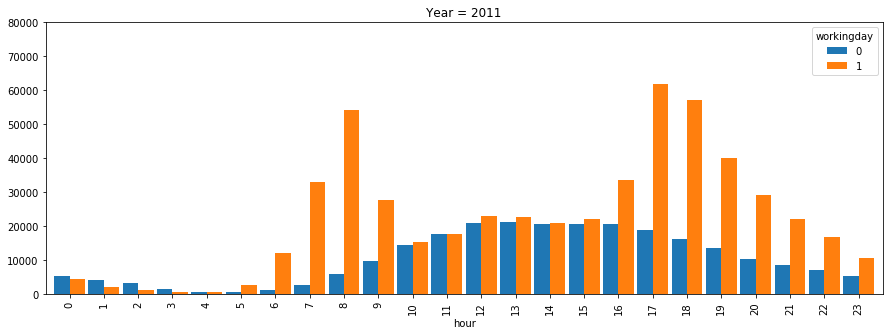

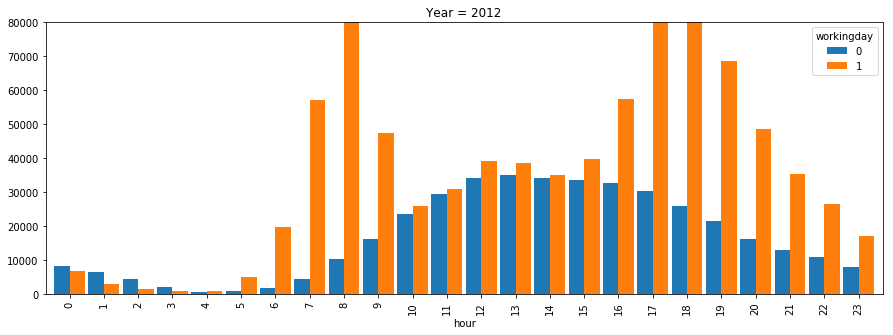

In [20]:
# agg funkcja agregująca dostaje wiele wartości na wejściu na wyjściu jedną
#  unstack transformacja Series doDataFrame

def plot_by_hour(data, year=None, agg="sum"):
    data["hour"] = data.datetime.dt.hour
    dd = data[data.datetime.dt.year == year] if year else data
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year))
plot_by_hour(df, year=2011)
plot_by_hour(df, year = 2012);

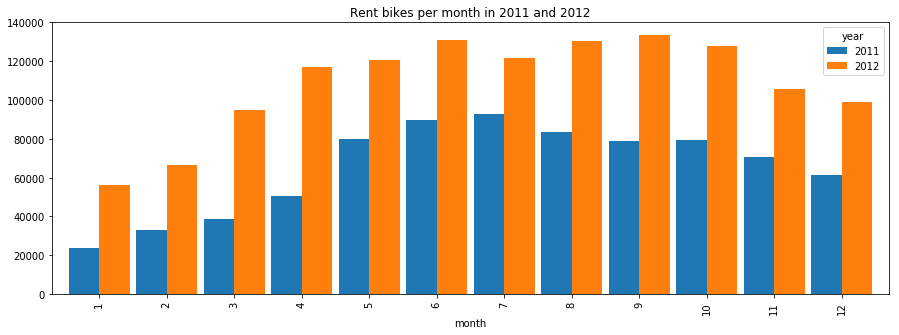

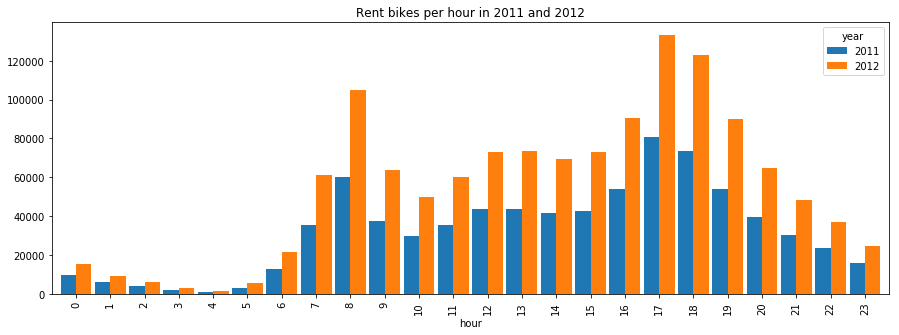

In [22]:
def plot_by_year(data, agg_attr, title):
    data["year"] = data.datetime.dt.year
    data["month"] = data.datetime.dt.month
    data["hour"] = data.datetime.dt.hour
    
    by_year = data.groupby([agg_attr, "year"])["count"].agg("sum").unstack()
    return by_year.plot(kind="bar", figsize=(15,5),width=0.9, title=title)
plot_by_year(df, "month","Rent bikes per month in 2011 and 2012")
plot_by_year(df, "hour", "Rent bikes per hour in 2011 and 2012");

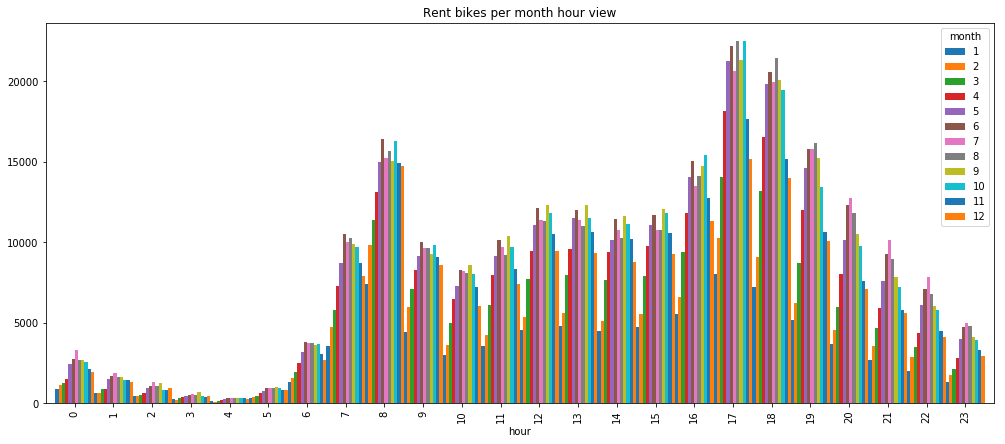

In [77]:
# fn z rozbiciem na poszczegególne godziny dla danych miesięcy
def plot_by_month(data,agg_attr, title):
    data["month"] = data.datetime.dt.month
    data["hour"] = data.datetime.dt.hour
    
    by_month = data.groupby([agg_attr, "month"])["count"].agg("sum").unstack()
    return by_month.plot(kind="bar", figsize=(17,7),width=1, title=title)

plot_by_month(df,"hour", "Rent bikes per month hour view");


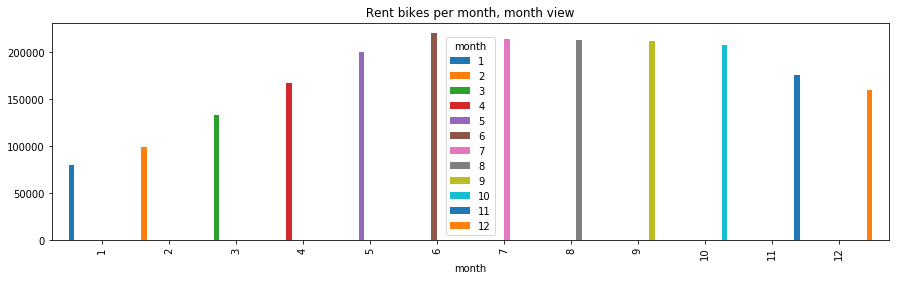

In [74]:
# tylko miesiące
def plot_by_month_two(data,agg_attr, title):
    data["month"] = data.datetime.dt.month
    
    by_month = data.groupby([agg_attr, "month"])["count"].agg("sum").unstack()
    return by_month.plot(kind="bar", figsize=(15,4),width=1, title=title)
plot_by_month_two(df, "month"," Rent bikes per month, month view ");

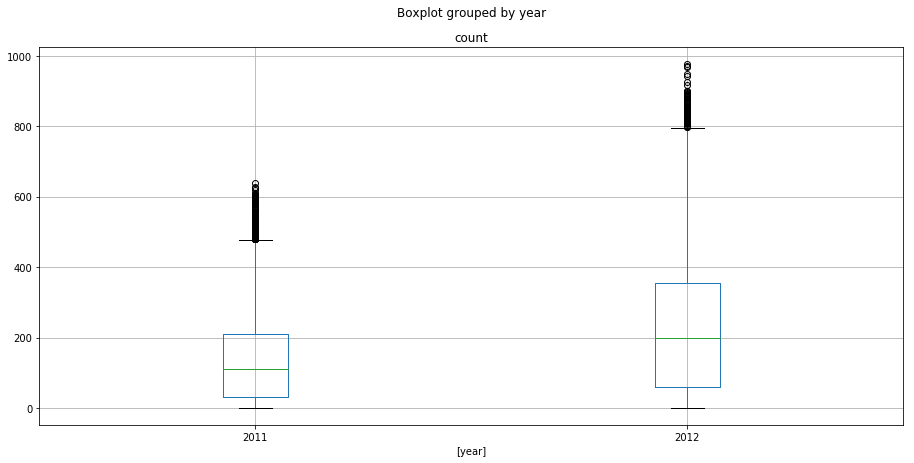

In [78]:
df[["count", "year"]].boxplot(by="year", figsize=(15,7));

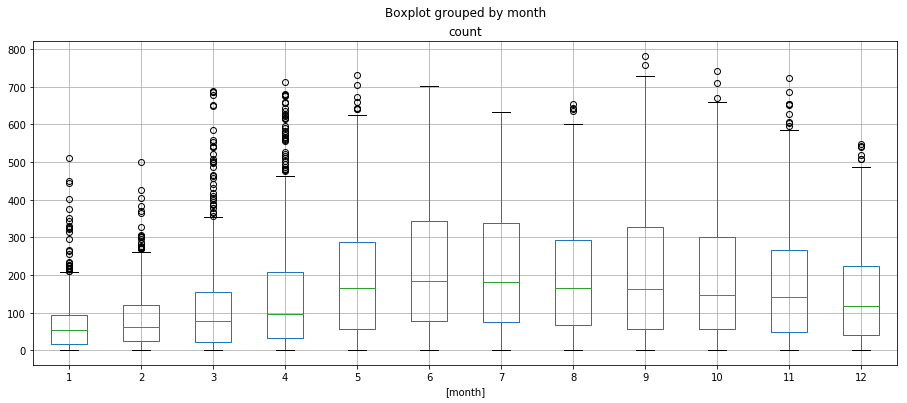

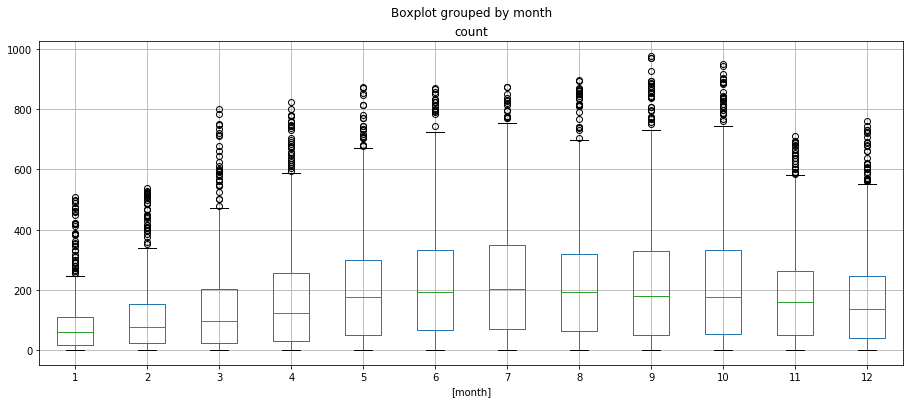

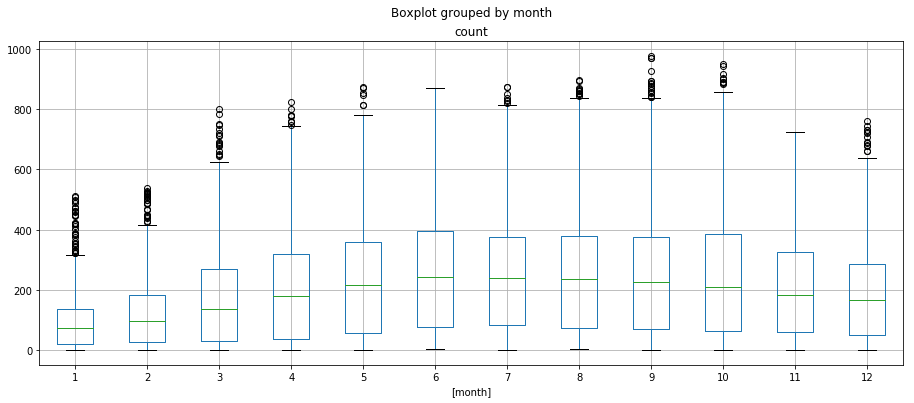

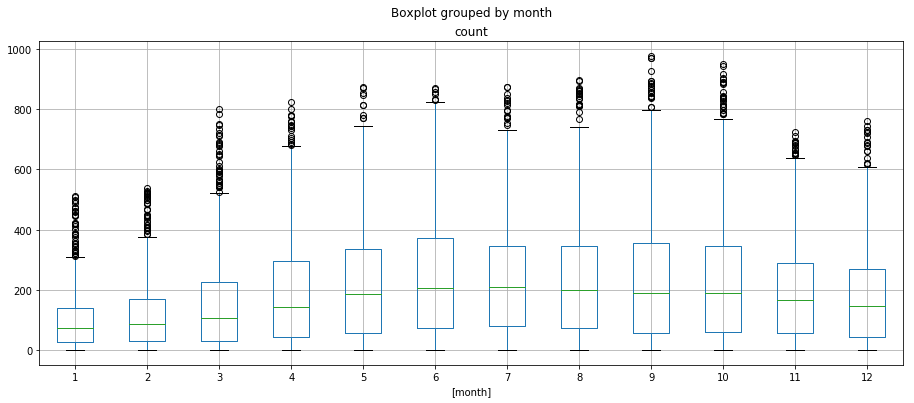

In [80]:
for year in [2011,2012]:
    for workingday in [0,1]:
        dd = df[(df.datetime.dt.year == year) | (df.workingday == workingday)]
        dd[["count", "month"]].boxplot(by="month", figsize=(15,6));
    

###### histogram

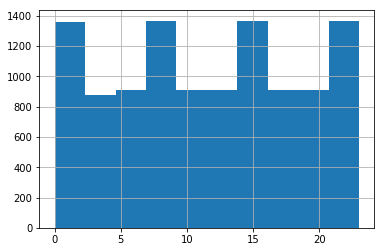

In [81]:
df["hour"].hist();

###### mapowanie

In [83]:
weather = {1: "Clear",2: "Mist", 3:"Light Snow", 4: "Heavy Rain"}
df["weather_label"] = df.weather.map(lambda x: weather[x])

df["weather_label"].unique()

array(['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], dtype=object)

In [84]:
df["weather_label"]

0             Clear
1             Clear
2             Clear
3             Clear
4             Clear
5              Mist
6             Clear
7             Clear
8             Clear
9             Clear
10            Clear
11            Clear
12            Clear
13             Mist
14             Mist
15             Mist
16             Mist
17             Mist
18       Light Snow
19       Light Snow
20             Mist
21             Mist
22             Mist
23             Mist
24             Mist
25             Mist
26             Mist
27             Mist
28             Mist
29       Light Snow
            ...    
10856         Clear
10857         Clear
10858         Clear
10859         Clear
10860         Clear
10861         Clear
10862         Clear
10863         Clear
10864         Clear
10865         Clear
10866         Clear
10867         Clear
10868         Clear
10869         Clear
10870         Clear
10871         Clear
10872         Clear
10873         Clear
10874         Clear


In [85]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'year', 'month', 'weather_label'],
      dtype='object')

In [86]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weather_label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,Clear


In [87]:
workingday = {0:"workingday", 1:"weekend"}
df["workingday_label"] = df.workingday.map(lambda x : workingday[x])
df["workingday_label"].unique()

array(['workingday', 'weekend'], dtype=object)

In [88]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'year', 'month', 'weather_label', 'workingday_label'],
      dtype='object')

In [89]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weather_label,workingday_label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,Clear,workingday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,Clear,workingday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,Clear,workingday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,Clear,workingday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,Clear,workingday


In [92]:
# łączenie kolumn fn apply
df["sum_count"] = df[["casual", "registered"]].apply(lambda x :"casual-{0}, registered-{1}".format(x["casual"], x["registered"]), axis=1).head()

In [93]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weather_label,workingday_label,sum_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,Clear,workingday,"casual-3, registered-13"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,Clear,workingday,"casual-8, registered-32"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,Clear,workingday,"casual-5, registered-27"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,Clear,workingday,"casual-3, registered-10"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,Clear,workingday,"casual-0, registered-1"


In [94]:
df["sum_count"]

0        casual-3, registered-13
1        casual-8, registered-32
2        casual-5, registered-27
3        casual-3, registered-10
4         casual-0, registered-1
5                            NaN
6                            NaN
7                            NaN
8                            NaN
9                            NaN
10                           NaN
11                           NaN
12                           NaN
13                           NaN
14                           NaN
15                           NaN
16                           NaN
17                           NaN
18                           NaN
19                           NaN
20                           NaN
21                           NaN
22                           NaN
23                           NaN
24                           NaN
25                           NaN
26                           NaN
27                           NaN
28                           NaN
29                           NaN
          

In [95]:
# unikalne wartości oraz jak dużo ich jest
df.year = df.datetime.dt.year
df["year"].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [97]:
df.mont = df.datetime.dt.month
df["month"].value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

In [98]:
# grupowanie wartości
df.groupby("year")["month"].value_counts()

year  month
2011  5        456
      6        456
      7        456
      8        456
      11       456
      12       456
      4        455
      10       455
      9        453
      2        446
      3        446
      1        431
2012  5        456
      6        456
      7        456
      8        456
      9        456
      10       456
      12       456
      2        455
      3        455
      11       455
      4        454
      1        453
Name: month, dtype: int64

In [99]:
# agregacja
df.groupby("year")["count"].agg(np.max)

year
2011    638
2012    977
Name: count, dtype: int64

In [102]:
for agg_func in [np.mean, np.median, np.min, np.max]:
    print(agg_func.__name__, df.groupby(["year", "month"])["count"].agg(agg_func))

mean year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64
median year  month
2011  1         47.0
      2         59.0
      3         72.0
      4         84.0
      5        154.0
      6        172.0
      7        173.0
      8        159.0
      9        147.0
      10       140.0
      11       133.5
      12       110.5
2012  1         93.0
      2        118.0
      3        171

In [103]:
for agg_fn in [np.min, np.max]:
    print(agg_fn.__name__, df.groupby(["month", "datetime"])["count"].agg(agg_fn))

amin month  datetime           
1      2011-01-01 00:00:00     16
       2011-01-01 01:00:00     40
       2011-01-01 02:00:00     32
       2011-01-01 03:00:00     13
       2011-01-01 04:00:00      1
       2011-01-01 05:00:00      1
       2011-01-01 06:00:00      2
       2011-01-01 07:00:00      3
       2011-01-01 08:00:00      8
       2011-01-01 09:00:00     14
       2011-01-01 10:00:00     36
       2011-01-01 11:00:00     56
       2011-01-01 12:00:00     84
       2011-01-01 13:00:00     94
       2011-01-01 14:00:00    106
       2011-01-01 15:00:00    110
       2011-01-01 16:00:00     93
       2011-01-01 17:00:00     67
       2011-01-01 18:00:00     35
       2011-01-01 19:00:00     37
       2011-01-01 20:00:00     36
       2011-01-01 21:00:00     34
       2011-01-01 22:00:00     28
       2011-01-01 23:00:00     39
       2011-01-02 00:00:00     17
       2011-01-02 01:00:00     17
       2011-01-02 02:00:00      9
       2011-01-02 03:00:00      6
       2011-01-0

In [104]:
for agg_fn in [np.min, np.max]:
    print(agg_fn.__name__, df.groupby(["month", "hour"])["count"].agg(agg_fn))

amin month  hour
1      0         3
       1         1
       2         1
       3         1
       4         1
       5         1
       6         1
       7         1
       8         8
       9        14
       10       31
       11       30
       12        3
       13       22
       14       28
       15       35
       16       49
       17       62
       18       35
       19       30
       20       22
       21       20
       22        9
       23        4
2      0         2
       1         3
       2         1
       3         1
       4         1
       5         1
              ... 
11     18      185
       19      111
       20       99
       21       75
       22       45
       23       31
12     0        17
       1         4
       2         1
       3         1
       4         1
       5         3
       6         3
       7        11
       8        32
       9        64
       10       33
       11       32
       12       33
       13       33
       14     

In [107]:
# sortowanie
# ascending True/False decyduje o rosnącym lub malejącym sortowaniu
df.sort_values(by=["year", "month"], ascending=True).head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weather_label,workingday_label,sum_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,Clear,workingday,"casual-3, registered-13"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,Clear,workingday,"casual-8, registered-32"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,Clear,workingday,"casual-5, registered-27"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,Clear,workingday,"casual-3, registered-10"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,Clear,workingday,"casual-0, registered-1"


In [108]:
df.sort_values(by=["year", "month"], ascending=False).head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weather_label,workingday_label,sum_count
10430,2012-12-01 00:00:00,4,0,0,1,10.66,15.150,81,0.0000,9,99,108,0,2012,12,Clear,workingday,NaN
10431,2012-12-01 01:00:00,4,0,0,1,10.66,15.150,81,0.0000,5,64,69,1,2012,12,Clear,workingday,NaN
10432,2012-12-01 02:00:00,4,0,0,2,10.66,15.150,81,0.0000,3,47,50,2,2012,12,Mist,workingday,NaN
10433,2012-12-01 03:00:00,4,0,0,2,10.66,13.635,81,8.9981,1,14,15,3,2012,12,Mist,workingday,NaN
10434,2012-12-01 04:00:00,4,0,0,1,10.66,14.395,81,6.0032,0,5,5,4,2012,12,Clear,workingday,NaN


In [114]:
df.to_csv("../bike-sharing-demand/output/df.csv", index=False)

In [116]:
pd.read_csv("../bike-sharing-demand/output/df.csv").head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weather_label,workingday_label,sum_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,Clear,workingday,"casual-3, registered-13"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,Clear,workingday,"casual-8, registered-32"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,Clear,workingday,"casual-5, registered-27"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,Clear,workingday,"casual-3, registered-10"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,Clear,workingday,"casual-0, registered-1"
